In [1]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils_VBFHH as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import json
import copy
from ROOT import TLorentzVector


Welcome to JupyROOT 6.18/00


## VBF HH kl study

In [10]:
dataframe_list = []
kl_list = [1,-2.,-2.9,8,1.]

year='2018'
year_dict = {}
year_dict['2018'] = 2
branch_names = ['event','HHbbggMVA','diHiggs_pt','diHiggs_mass','genMhh','MX','dijet_pt','dijet_eta','diphoton_pt','diphoton_eta','weight',
            'absCosThetaStar_CS','absCosTheta_bb','absCosTheta_gg','leadingPhoton_pt','leadingPhoton_eta',
            'subleadingPhoton_pt','subleadingPhoton_eta',
            'leadingJet_pt','leadingJet_eta','subleadingJet_eta','subleadingJet_pt']
branch_names += 'VBFDelta_phi,VBFJet_mjj,VBFProd_eta,VBFJet_Delta_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFleadJet_pt,VBFleadJet_eta,VBFsubleadJet_pt,VBFsubleadJet_eta'.split(',')
#branch_names = 'HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")


ntuples = 'vbfhh/' #preselection only
#ntuples = '' #after the training with C2V=0, MVA>0.7
couplings = 'CV_1_C2V_1_C3_1,CV_1_C2V_2_C3_1,CV_1_C2V_1_C3_2,CV_1_C2V_1_C3_0,CV_0_5_C2V_1_C3_1,CV_1_5_C2V_1_C3_1'.split(',') ### THE ORDER IS EXTREMELY IMPRORTANT, DO NOT CHANGE
signal = []
for coup in couplings :
    signal.append('output_VBFHHTo2B2G_%s_TuneCP5_PSWeights_13TeV-madgraph-pythia8.root'%coup)
    #signal.append('output_qqHH_%s_%s.root'%(coup.replace('_5','p5').replace('C3','kl'),year))#after the training with C2V=0, MVA>0.7
signal_name = 'vbfhh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year

for ikl,kl in enumerate(kl_list) :
    import training_utils as utils
    reload(utils)
    #utils.IO.ldata = '/work/nchernya/DiHiggs/inputs/22_04_2020/trees/'#after the training with C2V=0, MVA>0.7
    utils.IO.reweightVBFHH = True
    utils.IO.vbfhh_cv = [1.]  
    utils.IO.vbfhh_c2v = [1.]
    if ikl==len(kl_list)-1 : utils.IO.vbfhh_c2v = [0.]
    utils.IO.vbfhh_kl = [kl]
    for sig in signal:
        utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])
    cuts='MX>0'
    preprocessing.set_signals(branch_names,True,cuts)
    dataframe_list.append(copy.deepcopy(utils.IO.signal_df[0]))


using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001668
0 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01374
1 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001375
2 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.004454
3 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01046
4 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.0638
5 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001668
0 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01374
1 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001375
2 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.004454
3 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01046
4 1.0

In [11]:
utils.IO.signal_df[0].event = utils.IO.signal_df[0].event.astype('int64')
utils.IO.signal_df[0].query('event%5==0').shape

(73374, 38)

/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


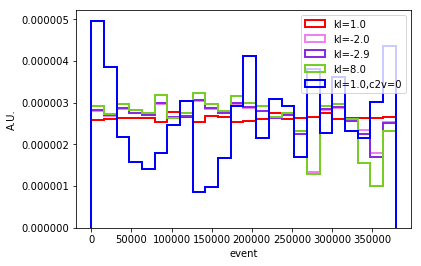

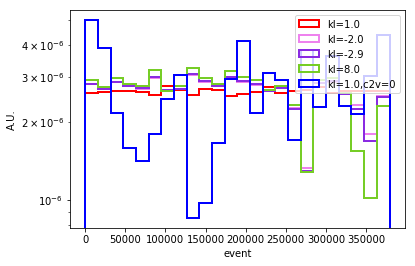

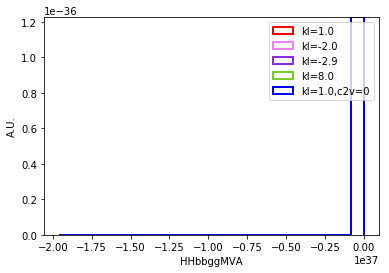

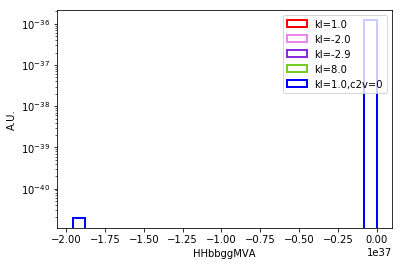

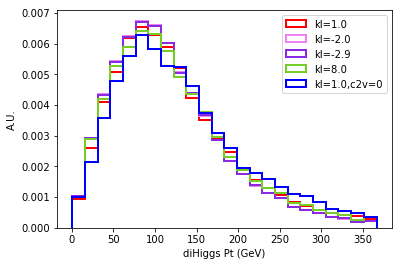

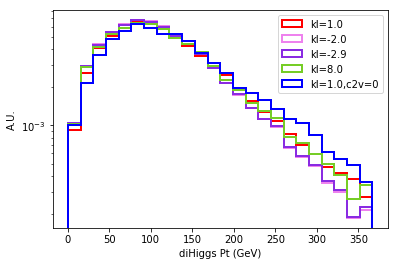

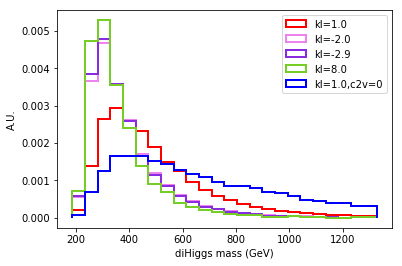

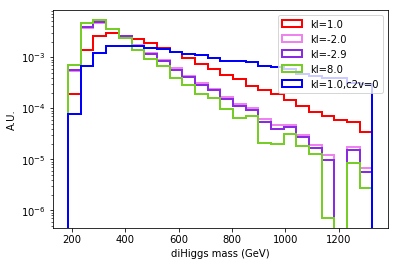

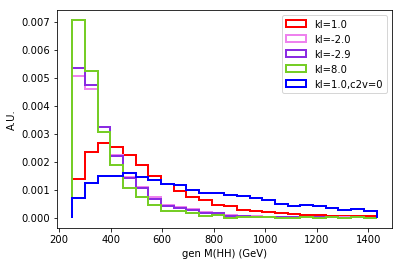

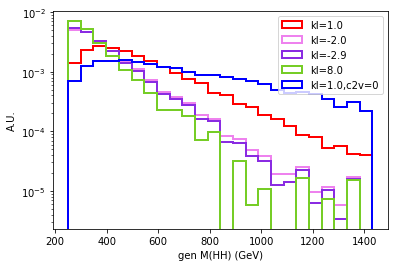

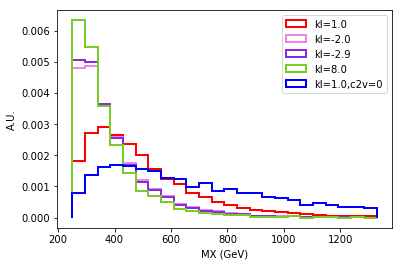

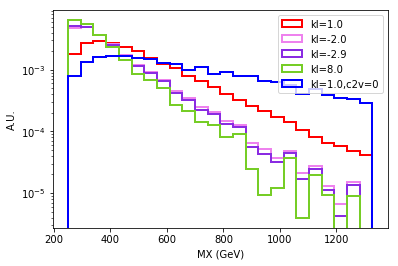

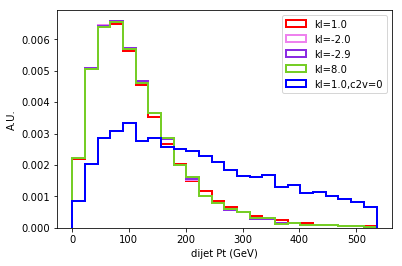

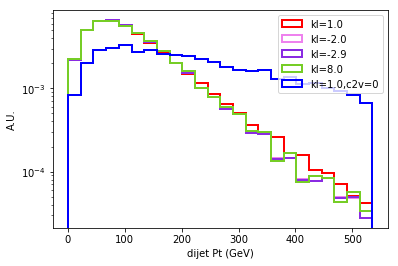

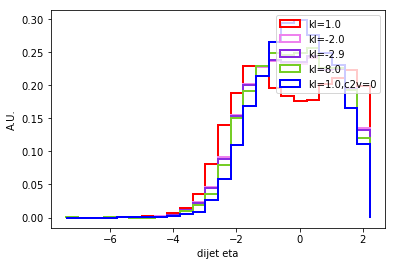

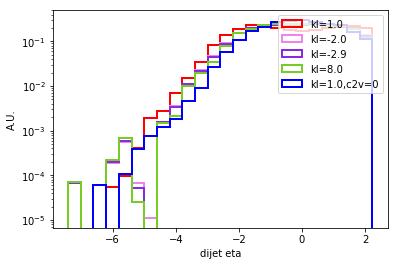

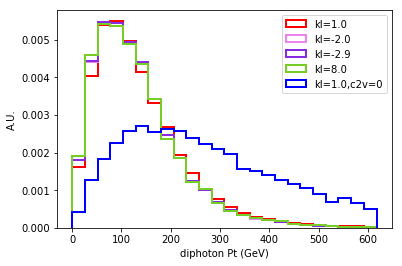

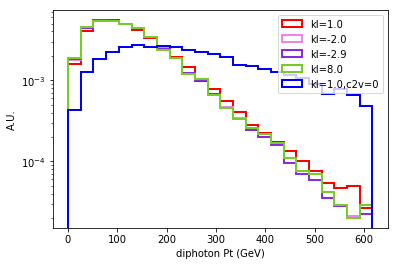

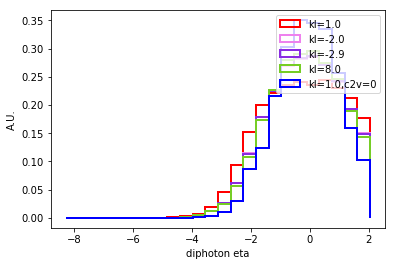

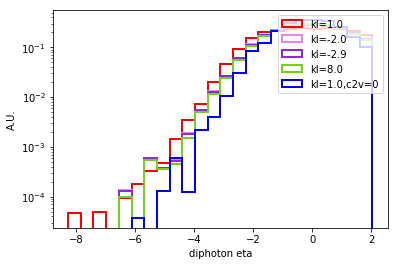

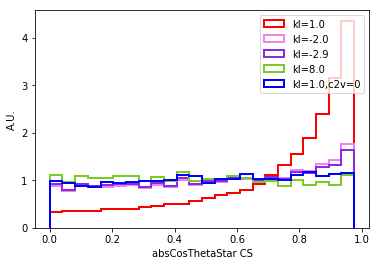

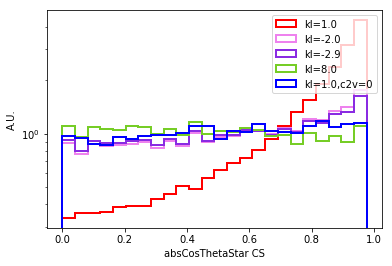

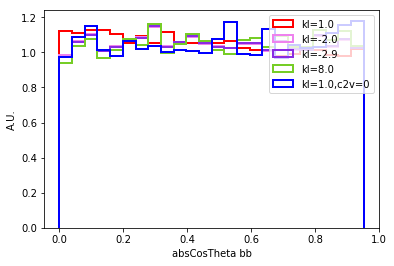

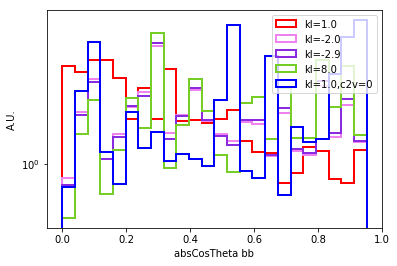

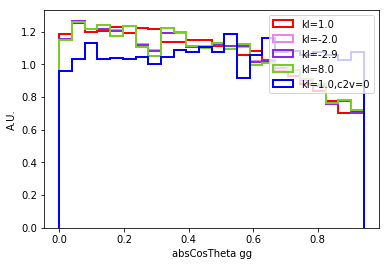

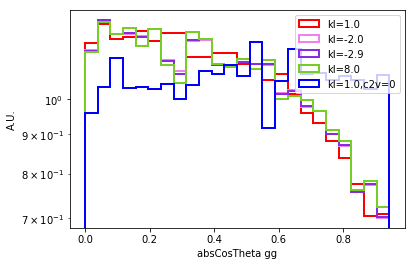

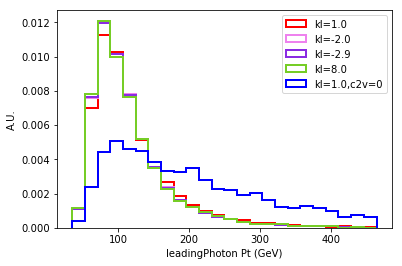

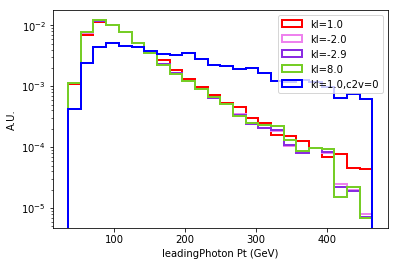

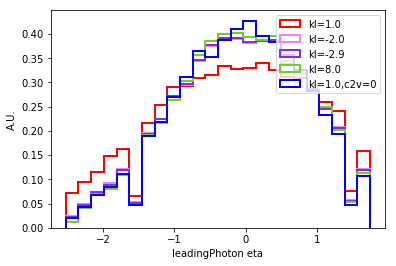

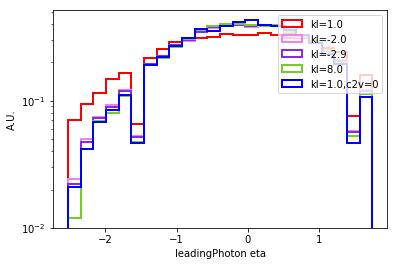

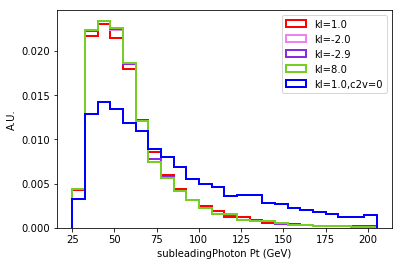

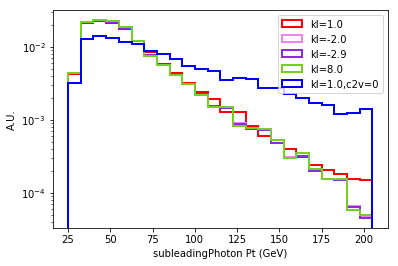

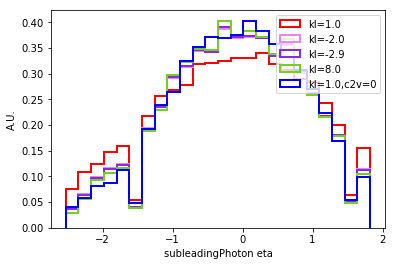

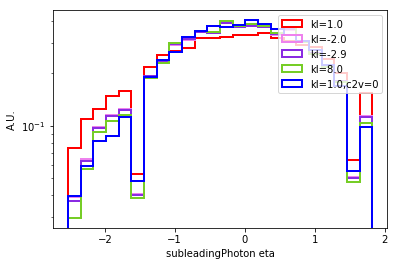

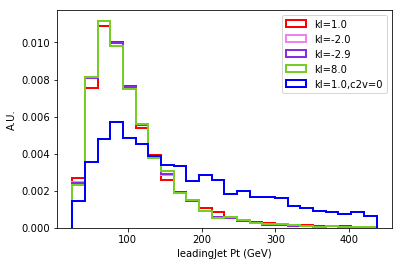

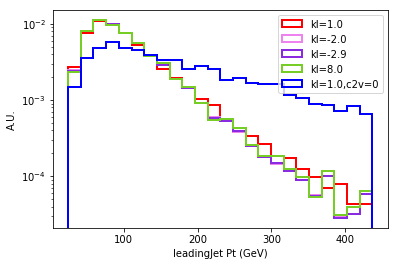

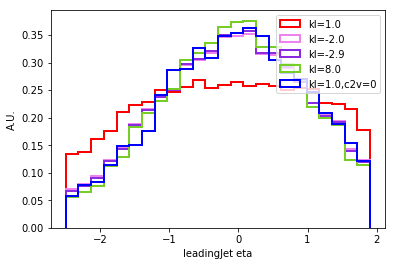

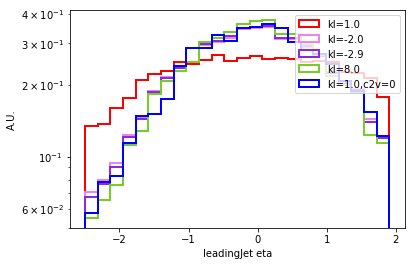

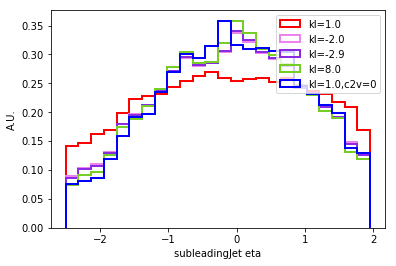

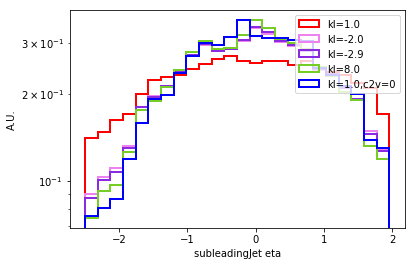

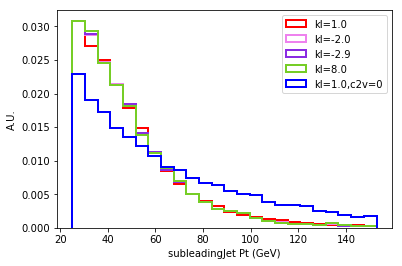

KeyboardInterrupt: 

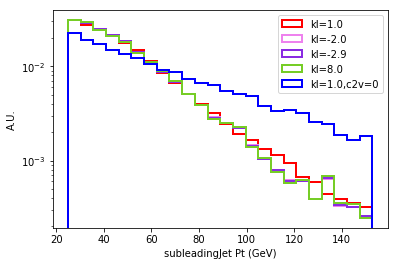

In [12]:

#plotting routine
numbins=25
#colors = 'pink,violet,#8A2BE2,#76cd26,blue'.split(',')
colors = 'red,violet,#8A2BE2,#76cd26,blue'.split(',')
for feat in branch_names:
    if 'weight' in feat: 
        continue
    feat=feat.replace('noexpand:','')
    #set the same range
    #if ('pt' in feat or 'Pt' in feat or 'mass' in feat or 'M' in feat or 'SigOverE' in feat) and (feat not in 'CMS_hgg_mass'):
    #    print "reducing binning"
    #    nbins = np.linspace(min(dataframe_list[0][feat]), np.quantile(dataframe_list[0][feat],0.95) , numbins)
    #else:
    #    nbins = numbins
    nbins = np.linspace(min(dataframe_list[0][feat]), np.quantile(dataframe_list[0][feat],0.95) , numbins)
    plt.clf()
    for i,kl in enumerate(kl_list):
        label='kl=%.1f'%kl
        if i==len(kl_list)-1 : label='kl=%.1f,c2v=0'%kl
        if i==0 : n, bins, patches = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,density=1,label=label)
        else : _,_,_ = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label=label)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(utils.IO.plotFolder+str(feat).replace('/','_').replace('(','').replace(')','')+".png")
    plt.show()
    
    plt.clf()
    plt.yscale('log')
    for i,kl in enumerate(kl_list):
        label='kl=%.1f'%kl
        if i==len(kl_list)-1 : label='kl=%.1f,c2v=0'%kl    
        if i==0 : n, bins, patches = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label=label)
        else : _,_,_ = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,density=1,label=label)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(utils.IO.plotFolder+str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png")

    plt.show()
    plt.yscale('linear')
      

In [ ]:
c2v_eff= sum(dataframe_list[1]['weight'])
c2v_eff_MX400= sum(dataframe_list[1].query('MX>500')['weight'])

print c2v_eff,c2v_eff_MX400,c2v_eff_MX400/c2v_eff



In [ ]:
c2v_eff= sum(dataframe_list[4]['weight'])
c2v_eff_MX400= sum(dataframe_list[4].query('MX>400')['weight'])

print c2v_eff,c2v_eff_MX400,c2v_eff_MX400/c2v_eff



## Folder name where to store output for a specific training

In [ ]:
labels=[]
outstr = "29_04_2020_vbfhh_gghh_%s_kl_corret"%year #_trainingvars_c2v0SR
labels.append(outstr)
utils.IO.plotFolder = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/%s/'%outstr
if not os.path.exists(utils.IO.plotFolder):
    print utils.IO.plotFolder, "doesn't exist, creating it..."
    os.makedirs(utils.IO.plotFolder)

In [ ]:
year='2018'

year_dict = {}
year_dict['2018'] = 2
year_dict['2017'] = 1
year_dict['2016'] = 0

ntuples = 'vbfhh/'

couplings = 'CV_1_C2V_1_C3_1,CV_1_C2V_2_C3_1,CV_1_C2V_1_C3_2,CV_1_C2V_1_C3_0,CV_0_5_C2V_1_C3_1,CV_1_5_C2V_1_C3_1'.split(',') ### THE ORDER IS EXTREMELY IMPRORTANT, DO NOT CHANGE
signal = []
for coup in couplings :
    signal.append('output_VBFHHTo2B2G_%s_TuneCP5_PSWeights_13TeV-madgraph-pythia8.root'%coup)
signal_name = 'vbfhh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year
    
utils.IO.reweightVBFHH = True
utils.IO.vbfhh_cv = [1.]  
utils.IO.vbfhh_c2v = [1.]
utils.IO.vbfhh_kl = [1.]
for sig in signal:
    utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])


In [ ]:
from ROOT import TLorentzVector

branch_names = 'event,weight,genMhh,MX'.split(',')
print utils.IO.reweightVBFHH
cuts='MX>0'
preprocessing.set_signals(branch_names,True,cuts)


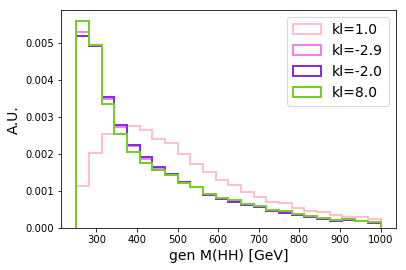

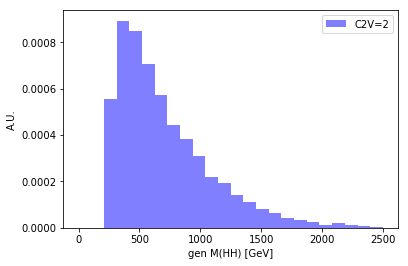

In [109]:
n, bins, patches = plt.hist(utils.IO.signal_df[0]['genMhh'], np.linspace(0,2500,25), facecolor='b',weights=utils.IO.signal_df[0]['weight'], alpha=0.5,normed=False,label='C2V=2')
plt.xlabel('gen M(HH) [GeV]')
plt.ylabel('A.U.')
plt.legend(loc = 'upper right')
plt.show()
    

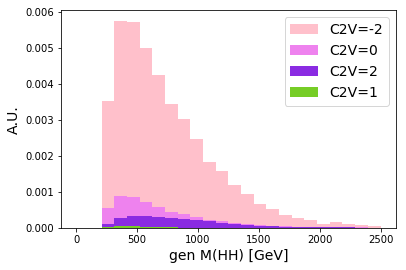

In [179]:
n, bins, patches = plt.hist(c2v_m2['genMhh'],color='pink', bins=np.linspace(0,2500,25),weights=c2v_m2['weight'], alpha=1.,normed=False,label='C2V=-2')
_,_,_ = plt.hist(c2v_0['genMhh'],color='violet', bins=bins,weights=c2v_0['weight'], alpha=1.,normed=False,label='C2V=0')
_,_,_ = plt.hist(c2v_2['genMhh'],color='#8A2BE2', bins=bins,weights=c2v_2['weight'], alpha=1.,normed=False,label='C2V=2')
_,_,_ = plt.hist(c2v_1['genMhh'],color='#76cd26', bins=bins,weights=c2v_1['weight'], alpha=1.,normed=False,label='C2V=1')
plt.xlabel('gen M(HH) [GeV]', fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper right', fontsize=14)
plt.savefig('genMHH_xsec.pdf')
plt.show()
    

In [143]:
import uproot
def load_data(file_name, branches, process,treedir,selection='',entrystop=None,):

    root_file = uproot.open(file_name)
    df = root_file[treedir+process].pandas.df(branches, entrystop=entrystop).dropna()
    if selection!='' :
        print 'applying ',selection
        df = df.query(selection)
    print("Entries in ntuple:")
    print(len(df))
    return df

In [144]:
file = "/work/nchernya/HHbbgg_ETH_devel/root_files/vbfhh_preselection/Total_preselection_diffNaming_transformedMVA.root"

In [146]:
ggHH_df = load_data(file,"MVAOutputTransformed,lumi,weight".split(','),'reducedTree_bkg_GluGluToHHTo2B2G_node_all','')
qqHH_df = load_data(file,"MVAOutputTransformed,lumi,weight".split(','),'reducedTree_sig','')


Entries in ntuple:
863767
Entries in ntuple:
551679


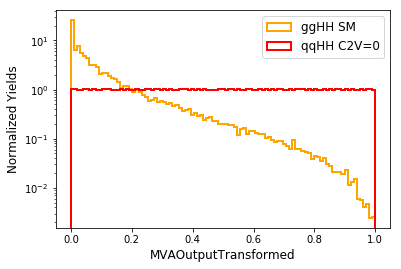

In [162]:
n, bins, patches = plt.hist(ggHH_df['MVAOutputTransformed'], bins=np.linspace(0,1,100),weights=ggHH_df['weight']*ggHH_df['lumi'], alpha=1,normed=True,label='ggHH SM',histtype='step',linewidth=2,color='orange')
_,_,_ = plt.hist(qqHH_df['MVAOutputTransformed'], bins=bins,weights=qqHH_df['weight']*qqHH_df['lumi'], alpha=1,normed=True,label='qqHH C2V=0',histtype='step',linewidth=2,color='r')
plt.xlabel('MVAOutputTransformed', fontsize=12)
plt.yscale('log')
plt.ylabel('Normalized Yields', fontsize=12)
plt.legend(loc = 'upper right', fontsize=12)
plt.savefig('mvaoutput_ggHH_qqHH.pdf')
plt.show()

## ggHH with anomolous kl in vbf category

In [26]:
dataframe_list = []
kl_list = [1,-2.]
kt_list = np.ones_like(len(kl_list))

year='2018'
year_dict = {}
year_dict['2018'] = 2
#branch_names = ['HHbbggMVA','genMhh','MX','weight','genweight']
#branch_names = 'genweight,HHbbggMVA,ttHScore,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")
branch_names = 'genweight,HHbbggMVA,ttHScore,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,diHiggs_pt,MX'.split(",")


ntuples = '' 
couplings = '1,5,2p45'.split(',') ### THE ORDER IS EXTREMELY IMPRORTANT, DO NOT CHANGE
signal = []
for coup in couplings :
    signal.append('output_hh_nlo_cHHH%s_2018.root'%coup)
    #signal.append('output_hh_nlo_kl_%s_kt_1.root'%coup)
signal_name = 'hh%s_13TeV_125_13TeV_DoubleHTag_0'%year #ggHH preselection
#signal_name = 'hh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year #VBF SR or preselection


for ikl,kl in enumerate(kl_list) :
    import training_utils as utils
    reload(utils)
    import preprocessing_utils as preprocessing_gghh
    reload(preprocessing_gghh)
    utils.IO.ldata = '/work/nchernya/HHbbgg_ETH_devel/root_files/ntuples_nlo_07042020_preselectionOnly_btagReshape_correct/%s/'%(year) #ggHH preselection
    #utils.IO.ldata = '/work/nchernya/DiHiggs/inputs/22_04_2020/trees/' #VBF SR 
    #utils.IO.ldata = '/work/nchernya/HHbbgg_ETH_devel/root_files/vbfhh_preselection_wo_ttHkiller/' #VBF preselection
    utils.IO.reweightGGFHH = True
    utils.IO.ggfhh_kl = [kl]  
    utils.IO.ggfhh_kt = [1.]
    for sig in signal:
        utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])
    cuts='(abs(genweight)<0.1) and (ttHScore>0.26) and (MX>500)'
   # cuts='(abs(genweight)<0.1)'
    preprocessing_gghh.set_signals(branch_names,True,cuts)
    dataframe_list.append(copy.deepcopy(utils.IO.signal_df[0]))


using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_DoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_DoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_DoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_DoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_DoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_DoubleHTag_0


In [27]:
gghh_vbflike_dataframe_list = []

ntuples = '' 
signal = []
for coup in couplings :
    #signal.append('output_hh_nlo_cHHH%s_2018.root'%coup)
    signal.append('output_hh_nlo_kl_%s_kt_1.root'%coup)
#signal_name = 'hh%s_13TeV_125_13TeV_DoubleHTag_0'%year #ggHH preselection
signal_name = 'hh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year #VBF SR or preselection


for ikl,kl in enumerate(kl_list) :
    import training_utils as utils
    reload(utils)
    import preprocessing_utils as preprocessing_gghh
    reload(preprocessing_gghh)
    #utils.IO.ldata = '/work/nchernya/HHbbgg_ETH_devel/root_files/ntuples_nlo_07042020_preselectionOnly_btagReshape_correct/%s/'%(year) #ggHH preselection
    #utils.IO.ldata = '/work/nchernya/DiHiggs/inputs/22_04_2020/trees/' #VBF SR 
    utils.IO.ldata = '/work/nchernya/HHbbgg_ETH_devel/root_files/vbfhh_preselection_wo_ttHkiller/' #VBF preselection
    utils.IO.reweightGGFHH = True
    utils.IO.ggfhh_kl = [kl]  
    utils.IO.ggfhh_kt = [1.]
    for sig in signal:
        utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])
    cuts='(abs(genweight)<0.1) and (ttHScore>0.26) and (MX>500)'
   # cuts='(abs(genweight)<0.1)'
    preprocessing_gghh.set_signals(branch_names,True,cuts)
    gghh_vbflike_dataframe_list.append(copy.deepcopy(utils.IO.signal_df[0]))


using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/hh2018_13TeV_125_13TeV_VBFDoubleHTag_0


In [28]:
#VBF ntuples now :
vbf_dataframe_list = []

ntuples = 'vbfhh/' #preselection only
couplings = 'CV_1_C2V_1_C3_1,CV_1_C2V_2_C3_1,CV_1_C2V_1_C3_2,CV_1_C2V_1_C3_0,CV_0_5_C2V_1_C3_1,CV_1_5_C2V_1_C3_1'.split(',') ### THE ORDER IS EXTREMELY IMPRORTANT, DO NOT CHANGE
signal = []
for coup in couplings :
    signal.append('output_VBFHHTo2B2G_%s_TuneCP5_PSWeights_13TeV-madgraph-pythia8.root'%coup)
    #signal.append('output_qqHH_%s_%s.root'%(coup.replace('_5','p5').replace('C3','kl'),year))#after the training with C2V=0, MVA>0.7
signal_name = 'vbfhh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year

for ikl,kl in enumerate(kl_list) :
    import training_utils as utils
    reload(utils)
    #utils.IO.ldata = '/work/nchernya/DiHiggs/inputs/22_04_2020/trees/'#after the training with C2V=0, MVA>0.7
    utils.IO.reweightVBFHH = True
    utils.IO.vbfhh_cv = [1.]  
    utils.IO.vbfhh_c2v = [1.]
    utils.IO.vbfhh_kl = [kl]
    for sig in signal:
        utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])
    cuts='MX>500'
    branch_names.pop(0) #genweight
    preprocessing.set_signals(branch_names,True,cuts)
    vbf_dataframe_list.append(copy.deepcopy(utils.IO.signal_df[0]))


using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001668
0 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01374
1 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001375
2 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.004454
3 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01046
4 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.0638
5 1.0 1.0 1
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001668
0 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01374
1 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.001375
2 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.004454
3 1.0 1.0 -2.0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
0.01046
4 1.0

In [29]:
outstr = "29_04_2020_ggfhh_%s_kl_VBF_vs_GF_categories_correct_gt500"%year 
utils.IO.plotFolder = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/%s/'%outstr
if not os.path.exists(utils.IO.plotFolder):
    print utils.IO.plotFolder, "doesn't exist, creating it..."
    os.makedirs(utils.IO.plotFolder)

/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/29_04_2020_ggfhh_2018_kl_VBF_vs_GF_categories_correct_gt500/ doesn't exist, creating it...


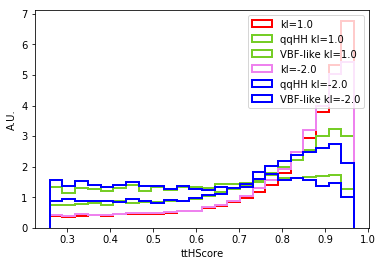

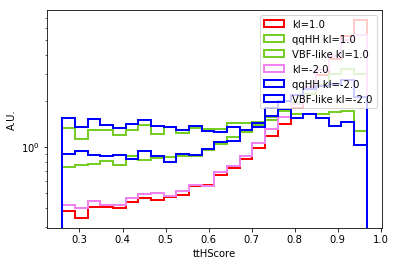

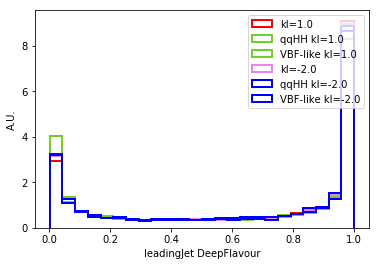

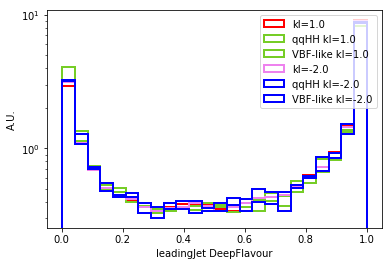

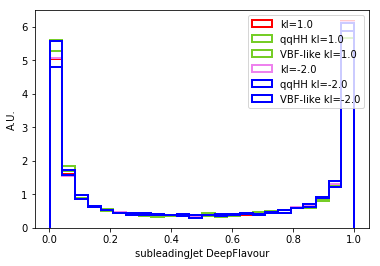

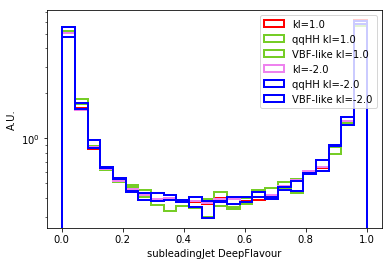

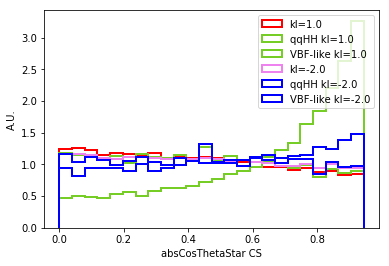

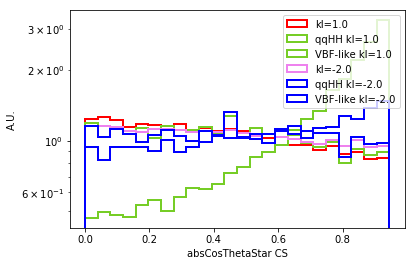

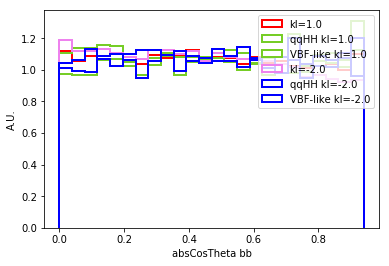

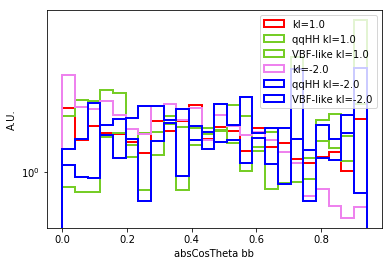

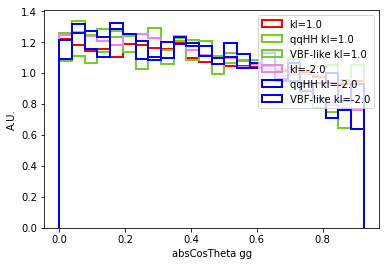

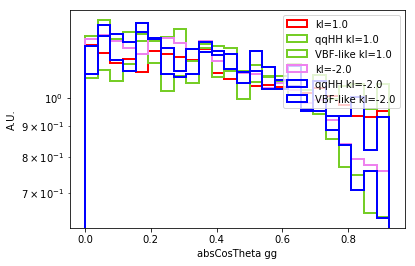

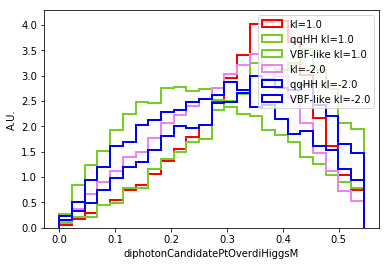

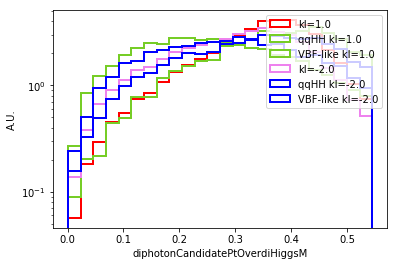

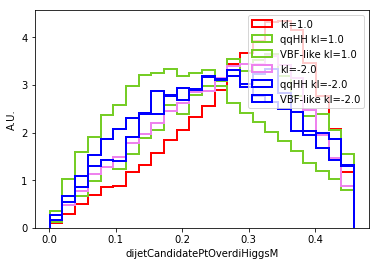

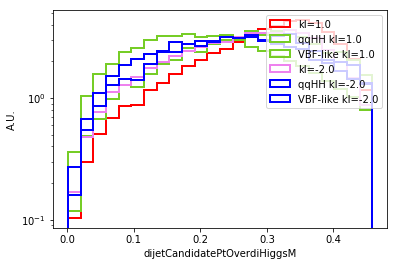

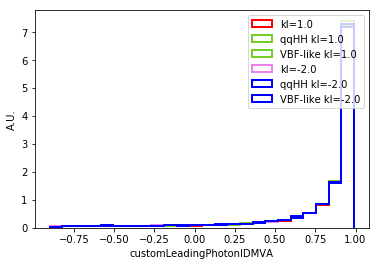

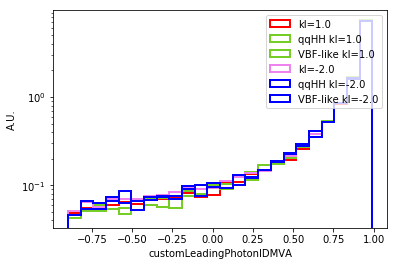

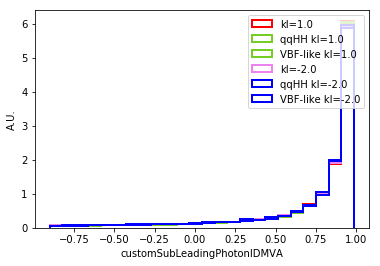

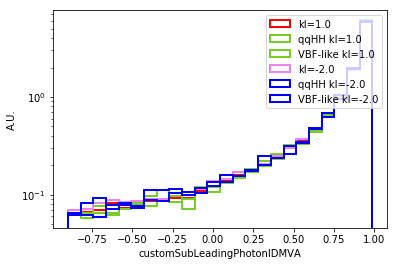

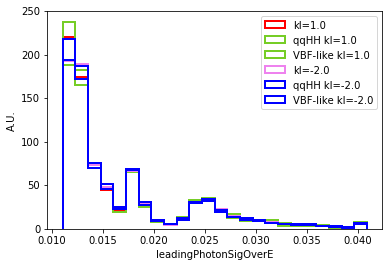

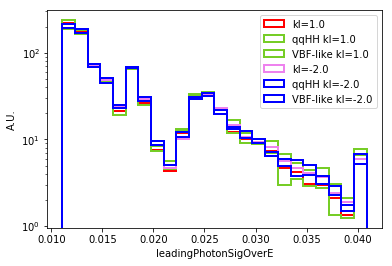

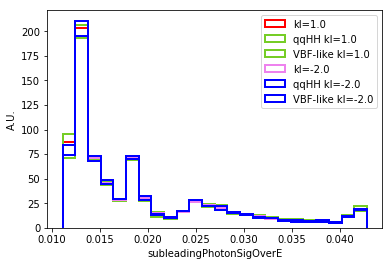

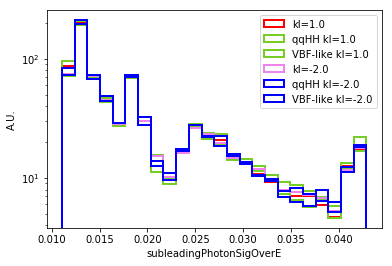

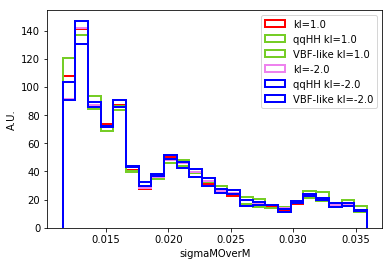

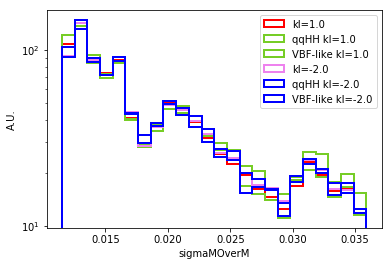

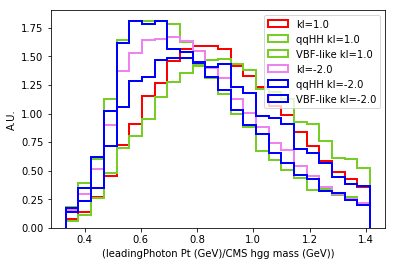

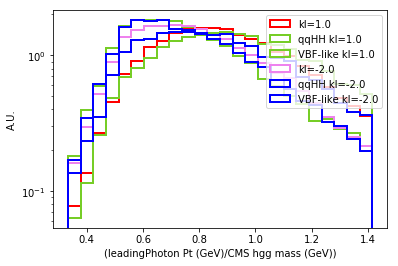

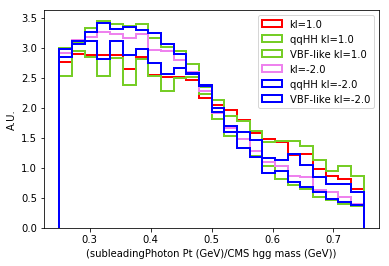

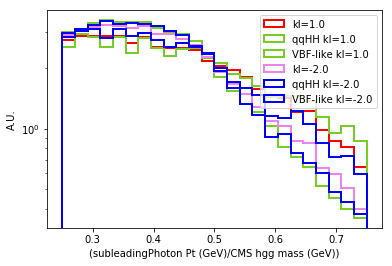

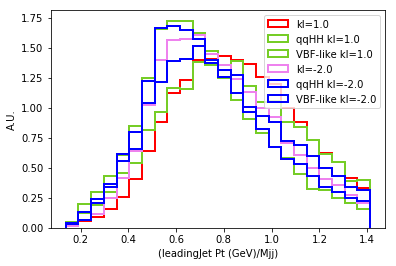

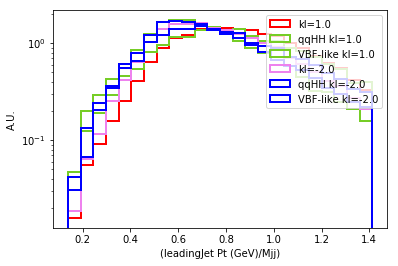

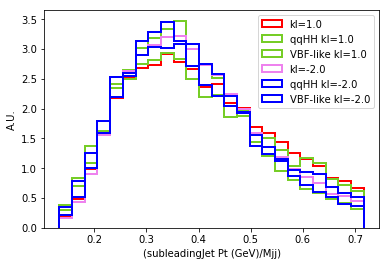

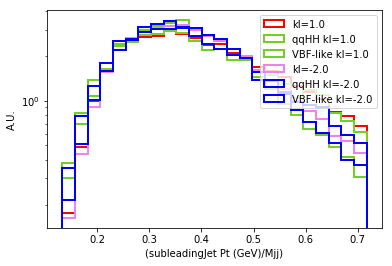

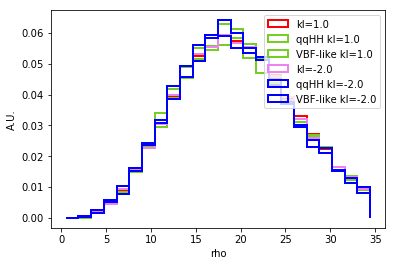

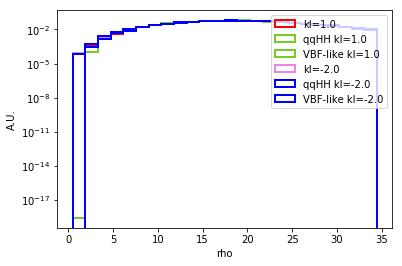

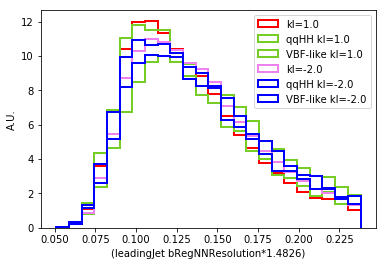

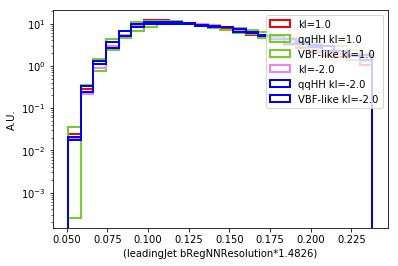

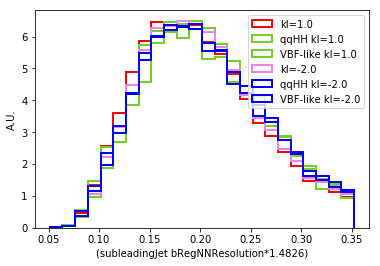

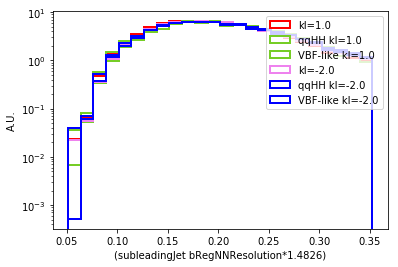

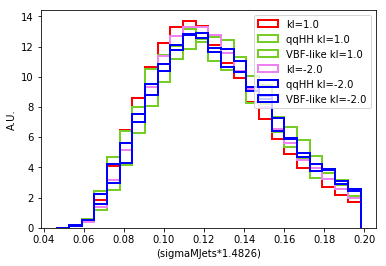

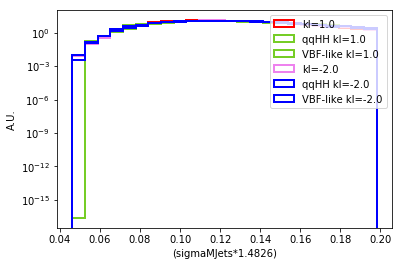

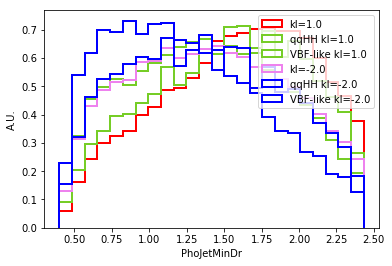

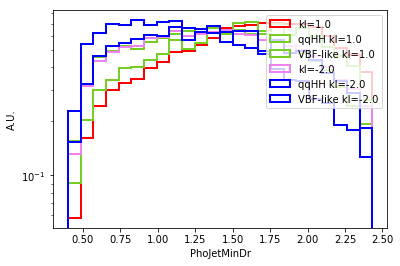

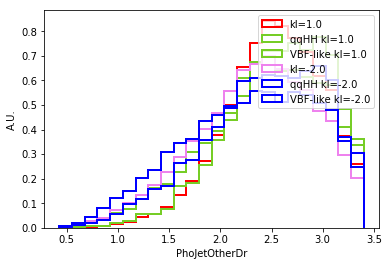

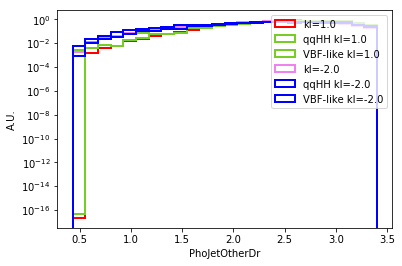

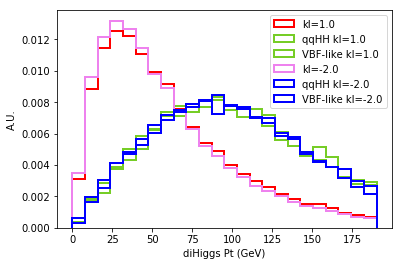

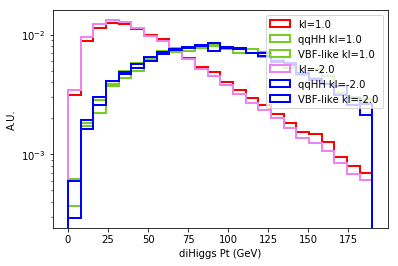

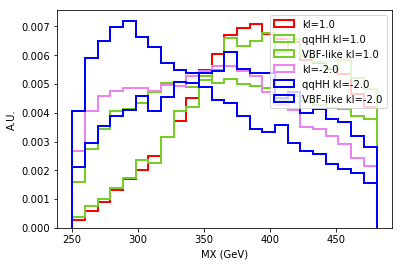

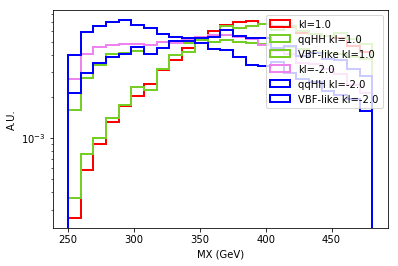

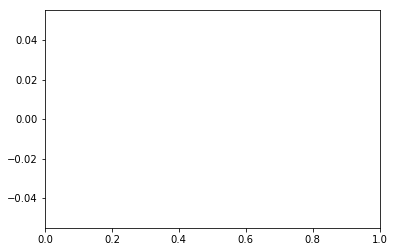

In [24]:
#plotting routine
numbins=25
#colors = 'pink,violet,#8A2BE2,#76cd26,blue'.split(',')
colors = 'red,violet,#8A2BE2,#76cd26,blue,green'.split(',')
vbf_colors = '#76cd26,blue,green'.split(',')
for feat in branch_names:
    if 'weight' in feat: 
        continue
    feat=feat.replace('noexpand:','')
    nbins = np.linspace(min(dataframe_list[0][feat]), np.quantile(dataframe_list[0][feat],0.95) , numbins)
    plt.clf()
    for i,kl in enumerate(kl_list):
        label='kl=%.1f'%kl
        if i==0 : n, bins, patches = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,density=1,label=label)
        else : _,_,_ = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label=label)
        _,_,_ = plt.hist(vbf_dataframe_list[i][feat],color=vbf_colors[i], bins=nbins,weights=vbf_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label='qqHH '+label)
        _,_,_ = plt.hist(gghh_vbflike_dataframe_list[i][feat],color=vbf_colors[i], bins=nbins,weights=gghh_vbflike_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label='VBF-like '+label)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(utils.IO.plotFolder+str(feat).replace('/','_').replace('(','').replace(')','')+".png")
    plt.show()
    
    plt.clf()
    plt.yscale('log')
    for i,kl in enumerate(kl_list):
        label='kl=%.1f'%kl
        if i==0 : n, bins, patches = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label=label)
        else : _,_,_ = plt.hist(dataframe_list[i][feat],color=colors[i], bins=nbins,weights=dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,density=1,label=label)
        _,_,_ = plt.hist(vbf_dataframe_list[i][feat],color=vbf_colors[i], bins=nbins,weights=vbf_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label='qqHH '+label)
        _,_,_ = plt.hist(gghh_vbflike_dataframe_list[i][feat],color=vbf_colors[i], bins=nbins,weights=gghh_vbflike_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label='VBF-like '+label)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(utils.IO.plotFolder+str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png")

    plt.show()
    plt.yscale('linear')

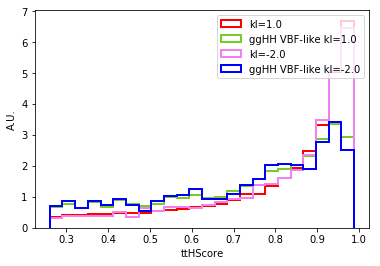

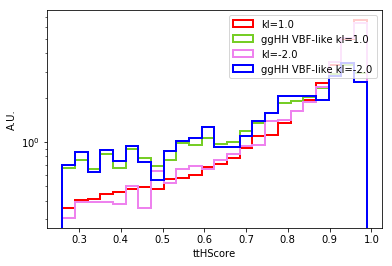

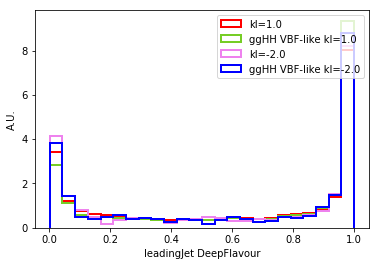

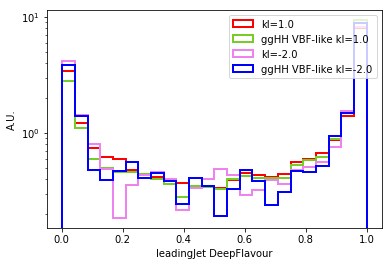

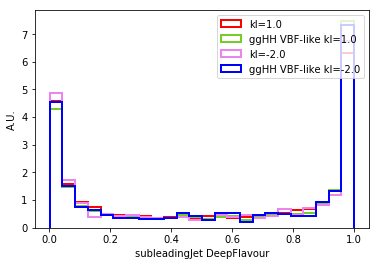

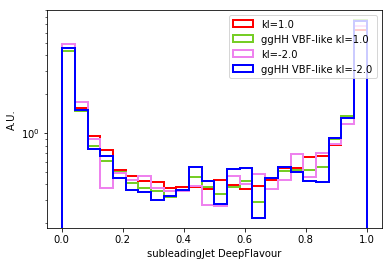

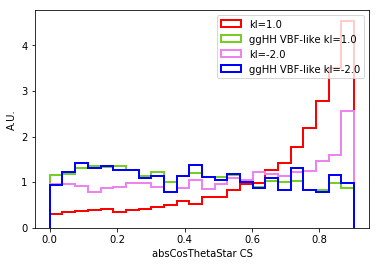

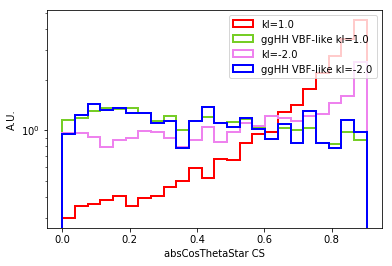

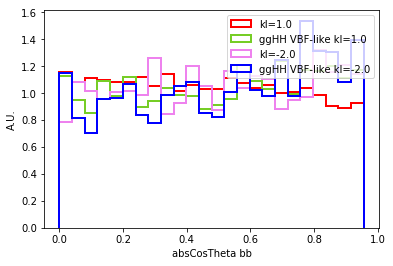

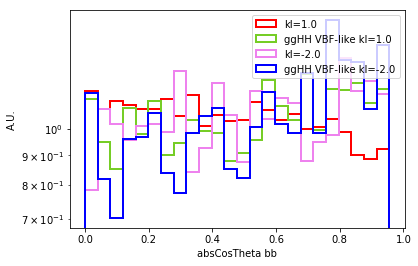

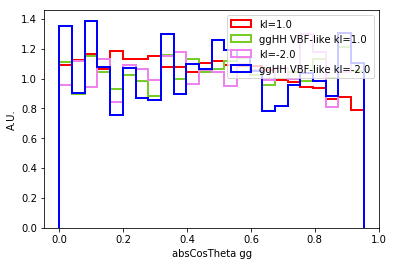

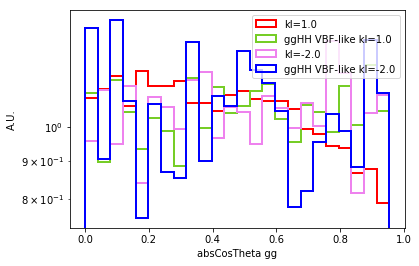

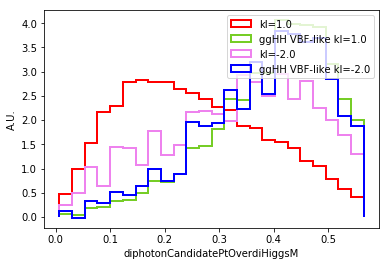

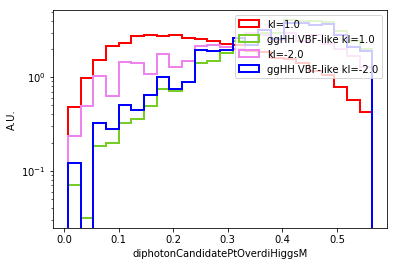

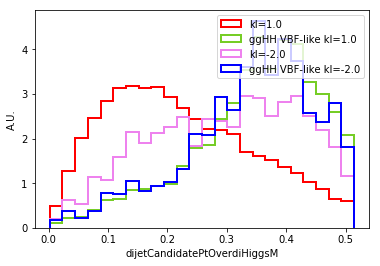

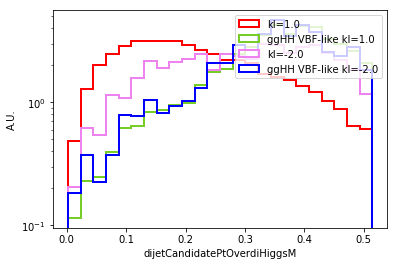

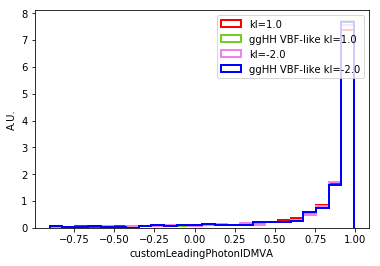

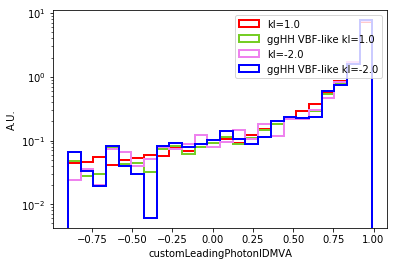

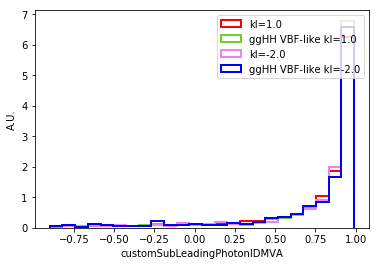

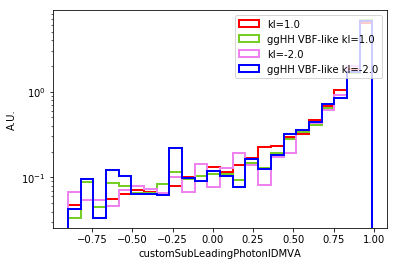

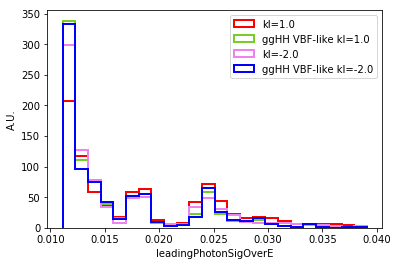

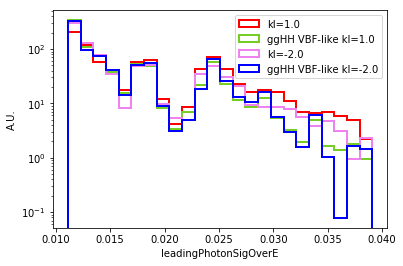

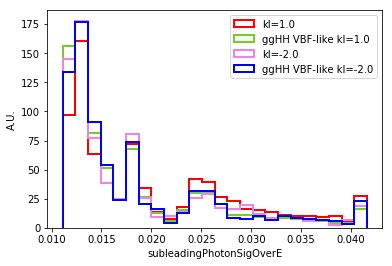

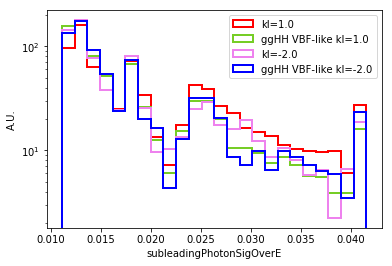

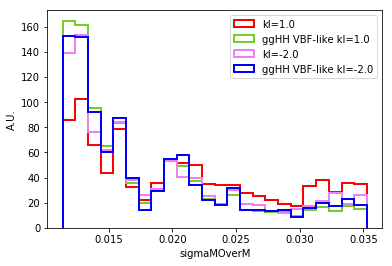

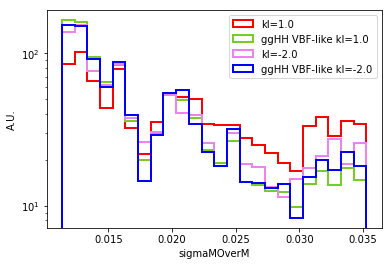

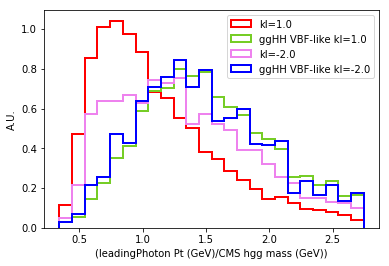

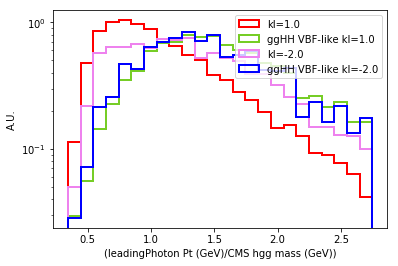

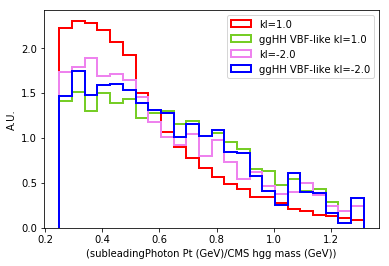

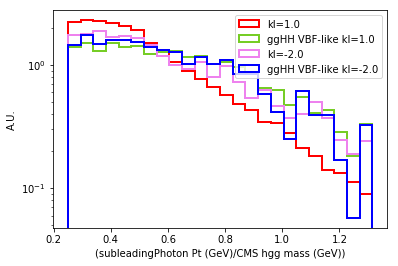

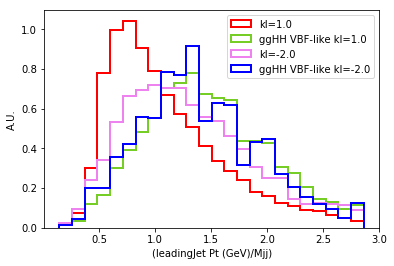

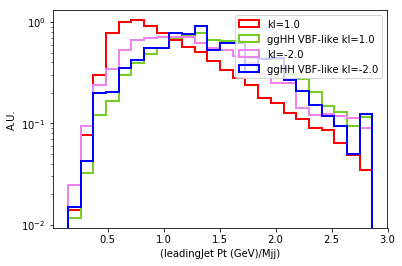

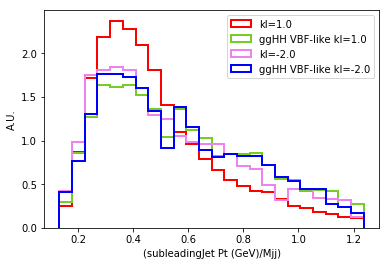

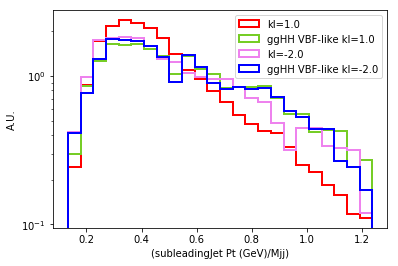

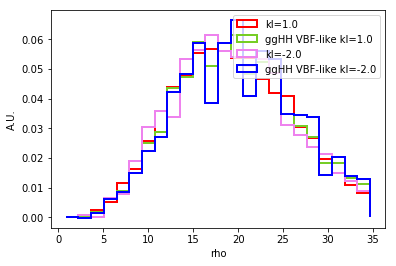

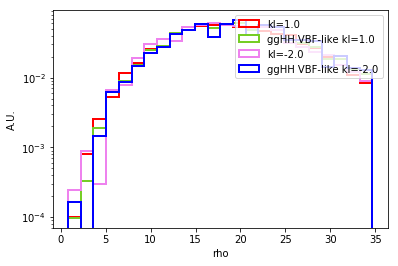

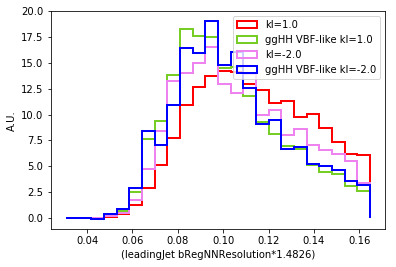

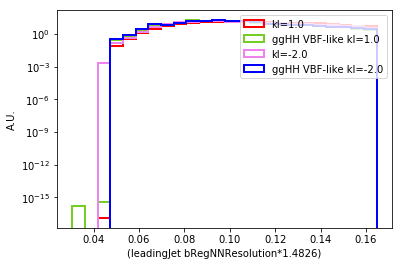

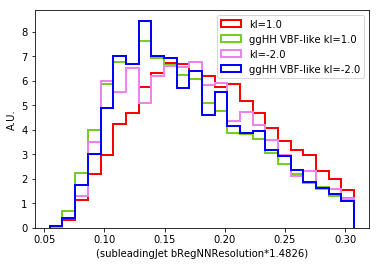

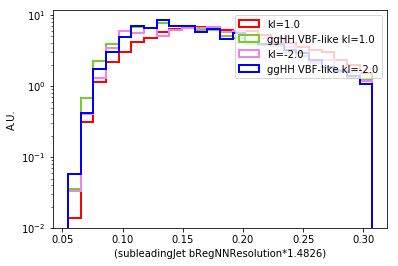

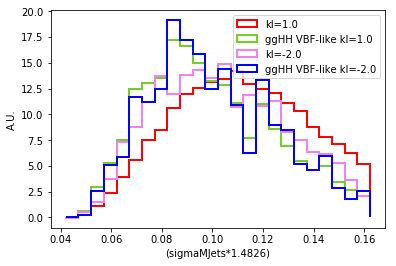

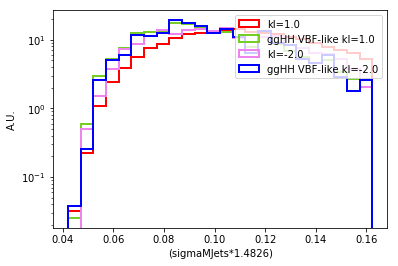

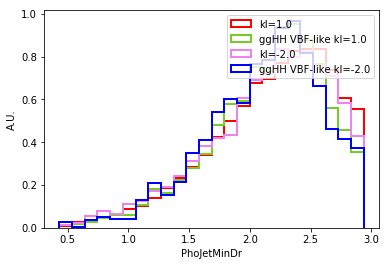

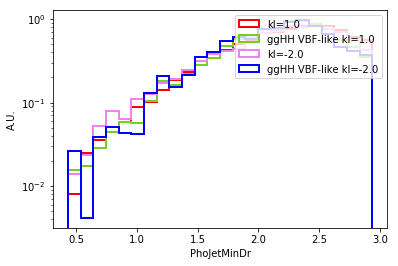

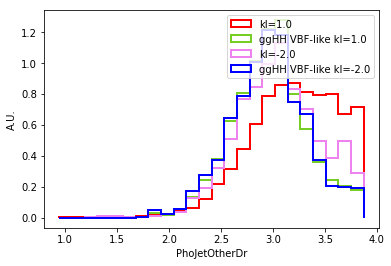

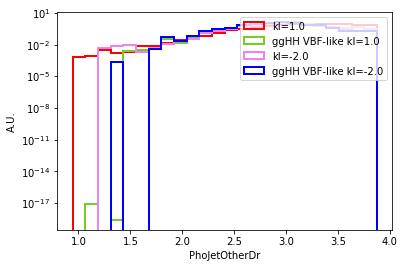

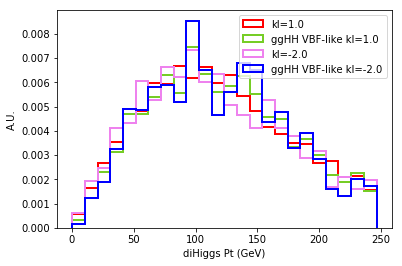

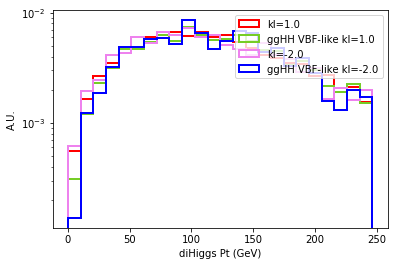

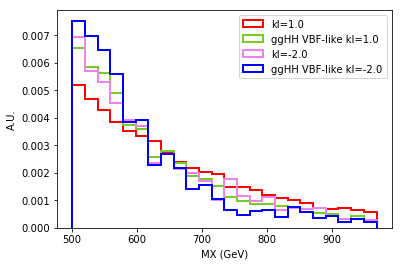

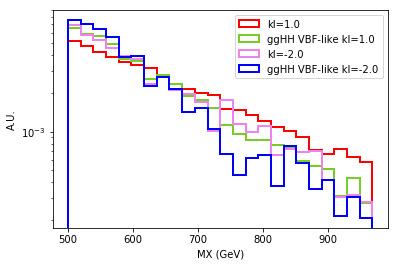

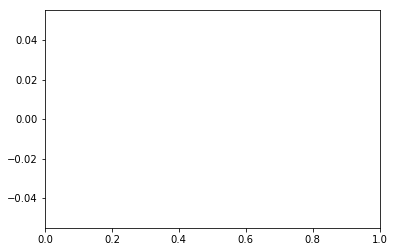

In [30]:
#plotting routine
numbins=25
#colors = 'pink,violet,#8A2BE2,#76cd26,blue'.split(',')
colors = 'red,violet,#8A2BE2,#76cd26,blue,green'.split(',')
vbf_colors = '#76cd26,blue,green'.split(',')
for feat in branch_names:
    if 'weight' in feat: 
        continue
    feat=feat.replace('noexpand:','')
    nbins = np.linspace(min(dataframe_list[0][feat]), np.quantile(dataframe_list[0][feat],0.95) , numbins)
    plt.clf()
    for i,kl in enumerate(kl_list):
        label='kl=%.1f'%kl
        if i==0 : n, bins, patches = plt.hist(vbf_dataframe_list[i][feat],color=colors[i], bins=nbins,weights=vbf_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,density=1,label=label)
        else : _,_,_ = plt.hist(vbf_dataframe_list[i][feat],color=colors[i], bins=nbins,weights=vbf_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label=label)
        _,_,_ = plt.hist(gghh_vbflike_dataframe_list[i][feat],color=vbf_colors[i], bins=nbins,weights=gghh_vbflike_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label='ggHH VBF-like '+label)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(utils.IO.plotFolder+str(feat).replace('/','_').replace('(','').replace(')','')+".png")
    plt.show()
    
    plt.clf()
    plt.yscale('log')
    for i,kl in enumerate(kl_list):
        label='kl=%.1f'%kl
        if i==0 : n, bins, patches = plt.hist(vbf_dataframe_list[i][feat],color=colors[i], bins=nbins,weights=vbf_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,density=1,label=label)
        else : _,_,_ = plt.hist(vbf_dataframe_list[i][feat],color=colors[i], bins=nbins,weights=vbf_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label=label)
        _,_,_ = plt.hist(gghh_vbflike_dataframe_list[i][feat],color=vbf_colors[i], bins=nbins,weights=gghh_vbflike_dataframe_list[i]['weight'], alpha=1,histtype='step',linewidth=2,normed=1,label='ggHH VBF-like '+label)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(utils.IO.plotFolder+str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png")

    plt.show()
    plt.yscale('linear')